In [ ]:
"""
!python -m pip install upgrade pip
!python -m pip install pymysql --user
"""

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt 
import pymysql
from psw import psw
from enum import Enum
import matplotlib.dates as mdates
from datetime import datetime

linkedin = "linkedin"
kijiji = "kijiji"
careerjet = "careerjet"

class Source(Enum):
    LINKEDIN = "b"
    CAREER = "r"
    KIJIJI = "y"


def get_data(datalist,pk):
    for ds in datalist:
        if ds[0] == pk:
            return ds[1]
    return None

def get_all_data():
    cursor = db.cursor()
    cursor.execute("SELECT id,data FROM myDashboard_data_dump")
    res = cursor.fetchall()
    return res
    
def map_source(link):    
    if linkedin in link:
        return Source.LINKEDIN.value
    elif careerjet in link:
        return Source.CAREER.value
    elif kijiji in link:
        return Source.KIJIJI.value
    else:
        return 0
    

def enumerate_link(link):
    if not link in links:
        links.append(link)       
        

def load_data_dump():
    res = defaultdict(list)
    cursor = db.cursor()
    cursor.execute("SELECT id, source, time from myDashboard_data_dump")
    dump = cursor.fetchall()
    
    for ds in dump:
        enumerate_link(ds[1])
        
    count = 0
    for ds in dump:
        link = ds[1]
        source = map_source(link)
        res["pk"].append( ds[0] )
        res["link"].append( links.index(link) )
        res["timesaved"].append( ds[2] )
        res["source"].append( map_source(link) )
        res["label"].append( Source(map_source(link)).name )
        count += 1 
    print(str(count) + " lines loaded \n")
    return res

print( "connecting to server...\n")
db = pymysql.connect("colarietitosti.info","cola", psw(),"dashDB" )
print("connected!\n")
links = []

print("downloading data...")
start = datetime.now()
data = get_all_data()
dd = load_data_dump()
end = datetime.now()
print("data loaded in ", end="")
print(end-start)

print( "\ndisconnecting from server.. ")
db.close()

connecting to server...

connected!

downloading data...
190 lines loaded 

data loaded in 0:00:01.375623

disconnecting from server.. 


In [4]:
from bs4 import BeautifulSoup

kijiji = "https://www.kijiji.it/"
careerjet = "https://www.careerjet.it/"
linkedin = "https://it.linkedin.com/"

count = 0
start = datetime.now()
data_for_plot = defaultdict(list)
for pk,t,l,s,lab in zip(dd["pk"], dd["timesaved"], dd["link"], dd["source"], dd["label"]):
    html = get_data(data,pk)
    soup = BeautifulSoup(html, "html.parser")
    
    if kijiji in links[l]:
        searchres = soup.find("ul", id="search-result")
        for li in searchres.find_all("li"):
            loc = li.find("p", class_="locale")
            if loc is None:
                continue
            a = li.find("a", class_="cta")
            title = a.text.strip()
            link = a["href"]
            try:
                data_for_plot[lab].append(link)
                data_for_plot[lab].append(t)    
                data_for_plot[lab].append(s)
                data_for_plot[lab].append(title)
                continue
            except:
                continue
            
    elif careerjet in links[l]:
        divs = soup.find_all("div", class_="job display-new-job clickable")
        for div in divs:
            title_div = div.find("a", class_="title-company")
            try:
                title = title_div.text        
            except AttributeError:
                continue
            
    elif linkedin in links[l]:
        title = soup.find("h1").text
        
    try:
        data_for_plot[lab].append(link)
        data_for_plot[lab].append(t)    
        data_for_plot[lab].append(s)
        data_for_plot[lab].append(title)
        continue
    except:
        continue
    if count % 50 == 0 and count != 0:
        print("#", end="")
    if count % 110 == 0 and count != 0:
        print("")
    count += 1
    
filename = "data_dump.csv"
  

end = datetime.now()
print(end-start)
    

0:00:08.832849


['Business Intelligence Specialist', 'Project V&V Manager (Traffic Management System)', 'Remote Support Engineer', 'Test engineer', 'Montatore Meccanico', 'TECNICO COMMERCIALE - UTENSILERIA MECCANICA DI PRECISIONE', 'Business Solution Specialist Online Flagship Stores - Maternity Cover', 'Programmatore senior', 'Sviluppatore C# - C# Programmer', 'Commercial Account Executive', 'Business Analyst', 'Test Analyst', 'project quality engineer', 'Sales Account Estero', 'E-COMMERCE MANAGER', 'Junior Java Developer - Industry 4.0 \\xe2\\x80\\x93 Smart Manufacturing', 'Academy Operations', 'Composite Engineer', 'Progettista meccanico', 'Electrical Engineer', 'Pre Sales Specialist - Area Amministrativa', 'Progettista meccanico senior \\xe2\\x80\\x93 Macchine automatiche', 'Sistemista Senior', 'Tecnico sistemi di gestione igiene e sicurezza sul lavoro', 'Calibration Engineer', 'Business Intelligence Specialist', 'Project V&V Manager (Traffic Management System)', 'Remote Support Engineer', 'Test e

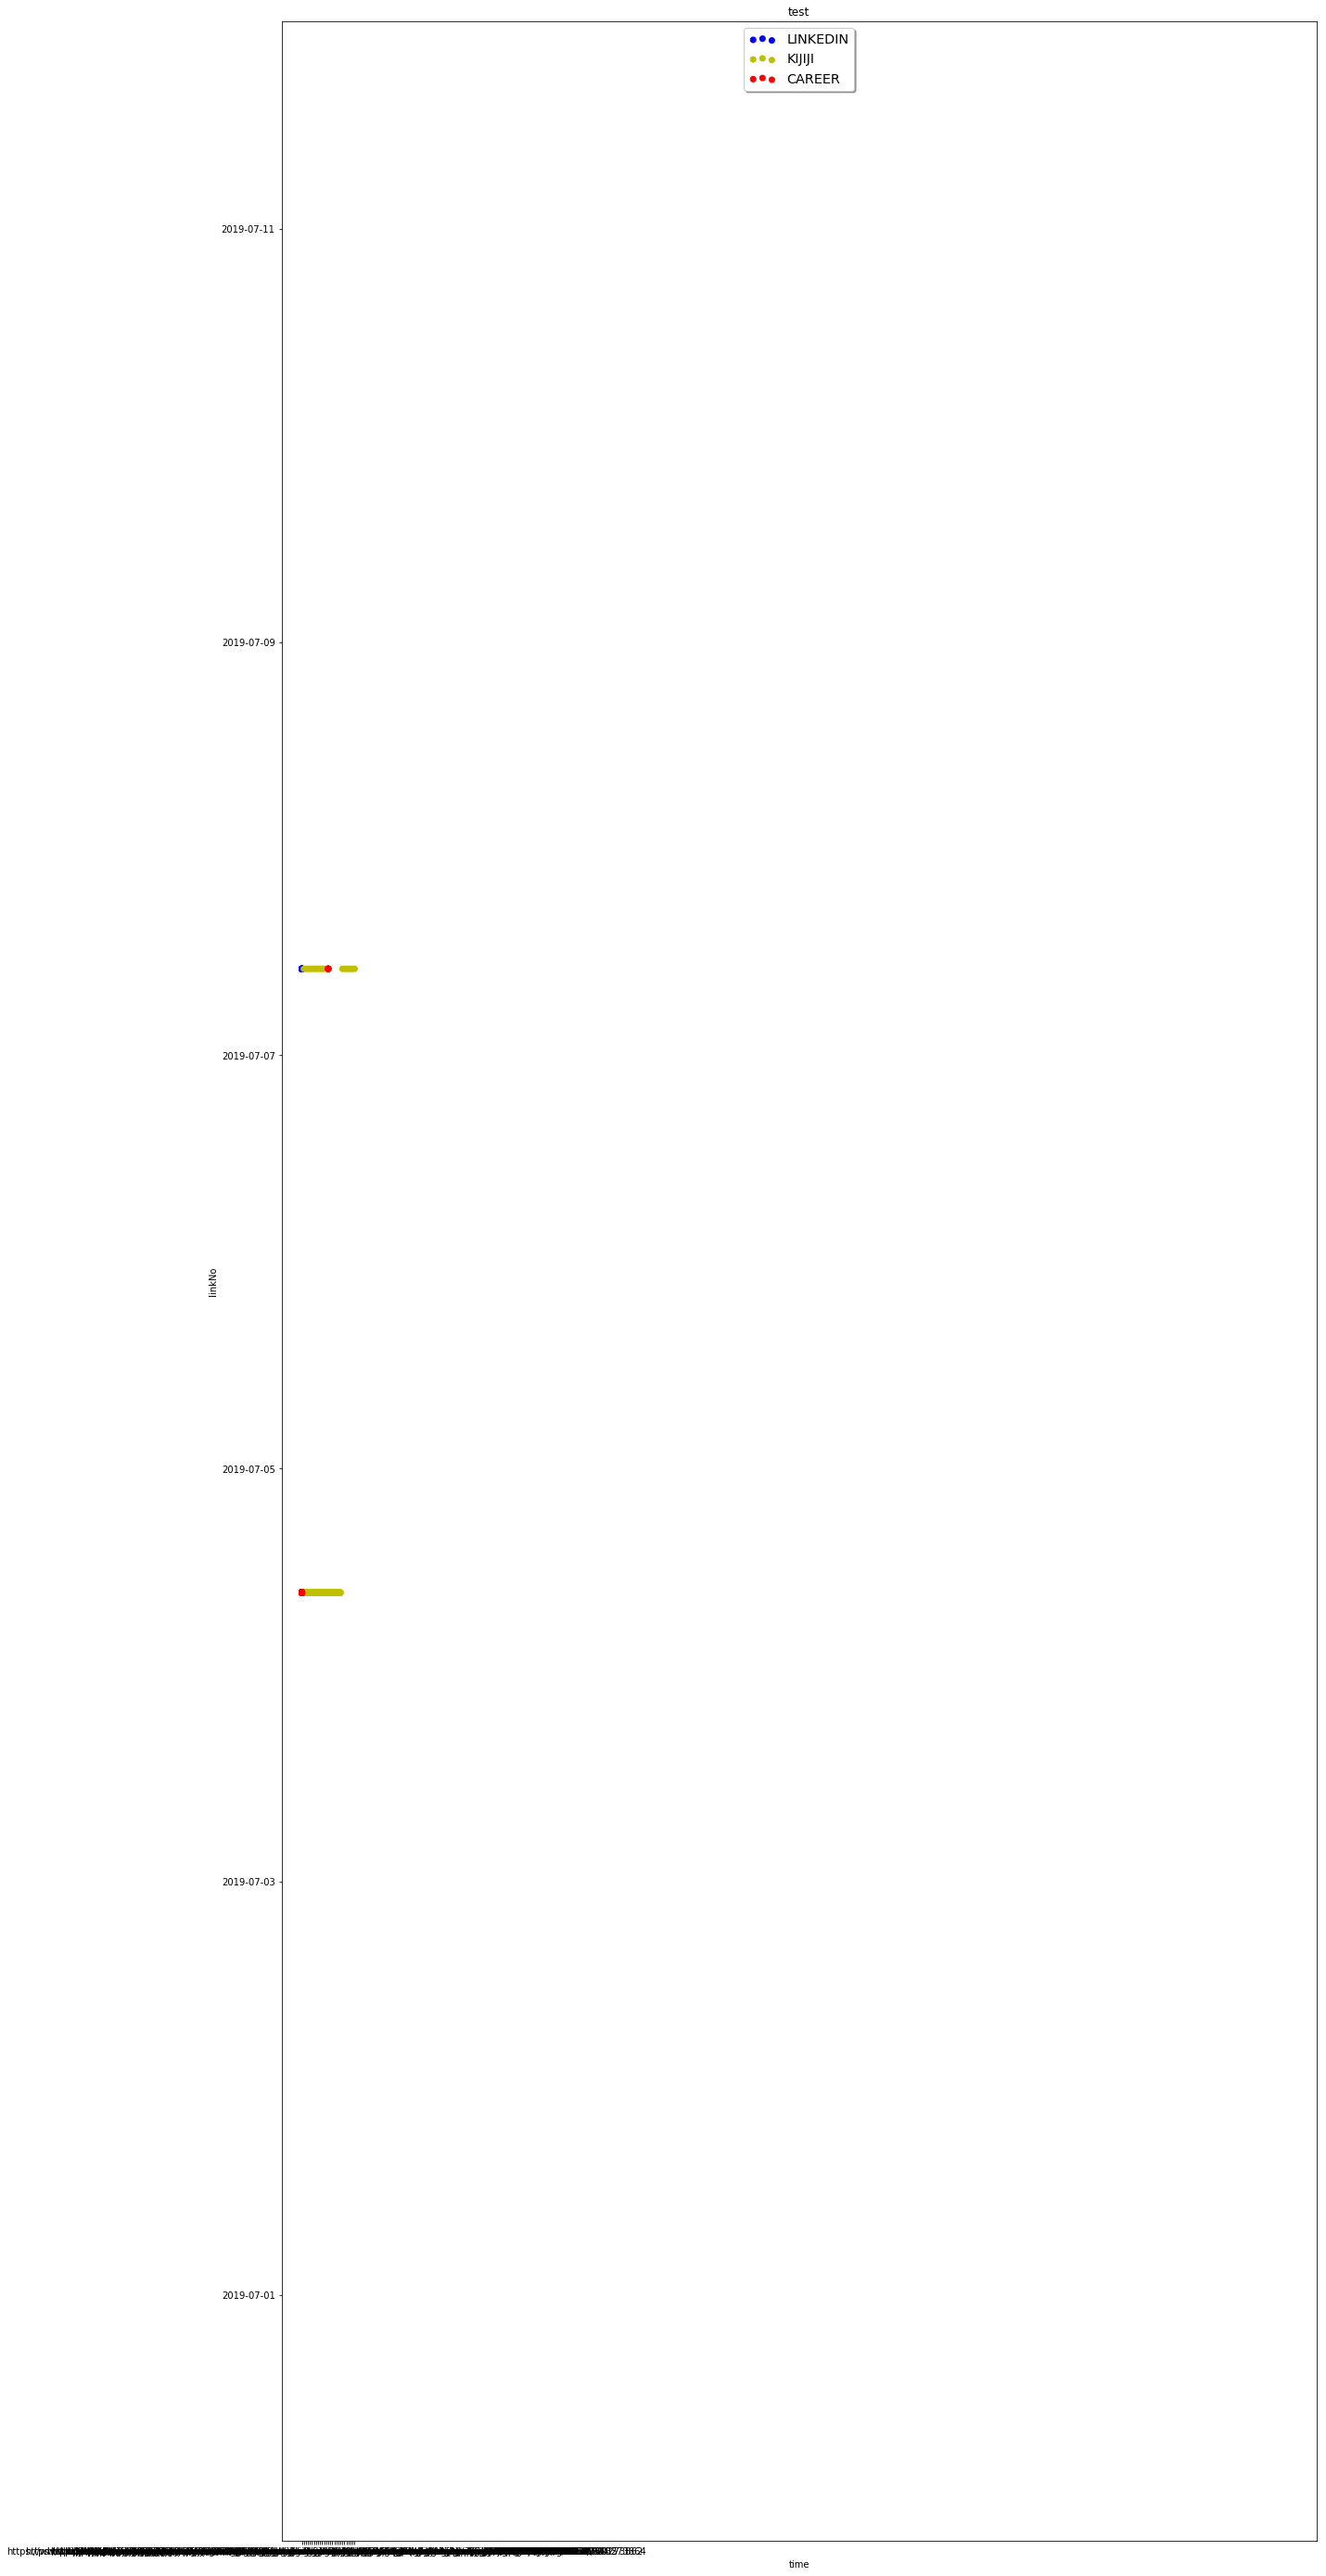

In [5]:

#y = res["timesaved"]
#x = res["link"]
minx, maxx = -10, 500
#miny, maxy = min(y), max(y)

## let's test plotting
plt.figure(0, figsize=(20, 50))
plt.title("test")
#plt.xticks(())
#plt.yticks(())
#print("{} {}".format(minx, maxx))
#print("{} {}".format(miny-21, maxy))
plt.xlim(minx, maxx)
#plt.ylim(miny, maxy)
plt.xlabel('time')
plt.ylabel('linkNo')
lables = set(data_for_plot)

#plt.format_xdata = mdates.DateFormatter('%m-%d')
    

#plt.scatter( res["timesaved"], res["link"], c=res["source"], label=set(res["label"]))
for i, l in enumerate(lables):
    print(data_for_plot[l][3::4])
    plt.scatter( data_for_plot[l][::4], data_for_plot[l][1::4],c=data_for_plot[l][2::4], \
                label=l,cmap=plt.cm.Set1_r)


leg = plt.legend(shadow=True, scatterpoints=3, fontsize="x-large", loc="upper center")
plt.show()

In [ ]:
# soon or later this has to run
